# Background

The city of Jakarta, the capital of Indonesia, is known for its bustling streets and heavy traffic congestion. As the population continues to grow, ensuring efficient and reliable public transportation becomes crucial in improving urban mobility and reducing congestion. In this business case, we analyze a dataset consisting of information on public transportation in Jakarta, including the year, month, type of public transportation, route code, route details, and passenger numbers.

## Problem Statement

The primary objective of this analysis is to gain insights into the usage and performance of different types of public transportation in Jakarta. By examining the passenger numbers and other relevant factors, we aim to identify opportunities for improvement and potential areas of investment to enhance the public transportation system's efficiency and effectiveness.

1. We can identify trend and patterns in passenger numbers over time, by transporation type and accros different route to check if there are any seasonality or trends. We also analyze the market share and growth rate per each type of transportation type.
2. We can compare the number of passenger counts between different routes to identify the most popular or least utilized one. We can calculate the growth rate, market shares, or ratios to make meaningful comparison.
3. We can do hypothesis testing to determine if there are any significant differences in passengers count based on different variables. 


## Data

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

In [69]:
#Load the dataset
df=pd.read_csv(r'C:\Users\Stephanie Aurelia\Desktop\Purwadhika\TransJakarta Passengers 2021.csv', delimiter=';')


The dataset consists of the time of when the data is collected, type of vehicle, route code, route, and the number of passengers. There are 6 columns in the dataset, which are:  


* Tahun (Year) : year of the data is collected
* Bulan (Month): month of the data is collected
* Jenis (Type) : type of vehicle
* Kode_trayek (Route Code): Route code that indicates route for each type of vehicle. 
* Trayek (Route): Information about the specific routes of public transportation in Jakarta. 
* Jumlah_penumpang (number of passengers): the dataset contains passenger numbers, representing the count of individuals using public transportation on a particular route during a specific periode.

Here are the samples of the heads and the tails of the data:  

In [70]:
display(df.head(), df.tail())

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616


,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4
1472,2021,11,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,3


In [71]:
display(df.describe(), df.describe(include='object'))

,tahun,bulan
count,1473.0,1473.000000
mean,2021.0,6.534963
std,0.0,3.446451
min,2021.0,1.000000
25%,2021.0,4.000000
50%,2021.0,7.000000
75%,2021.0,10.000000
max,2021.0,12.000000


,jenis,kode_trayek,trayek,jumlah_penumpang
count,1473,1473,1471,1473
unique,3,135,136,1409
top,Mikrotrans,JAK.88,Cililitan - Condet via Kayu Manis,0
freq,848,12,24,47


## Data Understanding and Cleaning

Before data analysys its crucial to understand the data and preparing it by cleaning the data. Data understanding is the process of exploring and gaining insights into the data, including understanding its structure, variables, and relationships. It involves examining the data's quality, completeness, and potential issues. Data cleaning, on the other hand, is the process of identifying and rectifying errors, inconsistencies, and inaccuracies in the dataset to ensure data quality, reliability, and compatibility for analysis and decision-making.

## Checking Data Type and Null Data

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1471 non-null   object
 5   jumlah_penumpang  1473 non-null   object
dtypes: int64(2), object(4)
memory usage: 69.2+ KB


In [73]:
df.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              2
jumlah_penumpang    0
dtype: int64

In [74]:
print(f'The number of rows and columns in df are {df.shape}')
df.info()

The number of rows and columns in df are (1473, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1471 non-null   object
 5   jumlah_penumpang  1473 non-null   object
dtypes: int64(2), object(4)
memory usage: 69.2+ KB


In [75]:
# # Remove extra spaces in 'trayek' column
# df['test_trayek'] = df['trayek'].str.strip()

# # Print the updated DataFrame
# print(df)


## Unique Values

In [76]:
pd.set_option('display.max_colwidth', -1)
# Unique data of each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

table1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
table1Desc

C:\Users\Stephanie Aurelia\AppData\Local\Temp\ipykernel_33516\959870767.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Column Name,Number of Unique,Unique Sample
0,tahun,1,[2021]
1,bulan,12,"[10, 8, 3, 6, 1, 5, 12, 9, 2, 7, 4, 11]"
2,jenis,3,"[Mikrotrans, BRT, Angkutan Umum Integrasi]"
3,kode_trayek,135,"[JAK.88, JAK.85, JAK.84, JAK.80, JA.77, JAK.75, JAK.74, JAK.73, JAK.72, JAK.71, JAK.64, JAK.61, JAK.60, JAK.59, JAK.58, JAK.56, JAK.54, JAK.53, JAK.52, JAK.51, JAK.50, JAK.49, JAK.47, JAK.46, JAK.45, JAK.44, JAK.43, JAK.42, JAK.41, JAK.40, JAK.39, JAK.38, JAK.37, JAK.36, JAK.35, JAK.34, JAK.33, JAK.32, JAK.31, JAK.30, JAK.29, JAK.28, JAK.27, JAK.26, JAK.25, JAK.24, JAK.22, JAK.21, JAK.20, ""JAK, JAK.18, JAK.17, JAK.16, JAK.15, JAK.14, JAK.13, JAK.12, JAK.117, JAK.112, JAK.11, JAK.10, JAK.09, JAK.08, JAK.07, JAK.06, JAK.05, JAK.04, JAK.03, JAK.02, JAK.01, 9, 8, 7, 6, 5, 4, 3, 2, 13, 12, 11, 10, 1, 9H, 9E, 9D, 8K, 8E, 8D, 8C, 7P, 7D, 7B, 7A, 6R, 6N, 6M, 6H, 6C, 5M, ...]"
4,trayek,136,"[Terminal Tanjung Priok - Ancol Barat, Bintara - Cipinang Indah, Terminal Kampung Melayu - Kapin Raya, Rawa Buaya - Rawa Kompeni, Tanjung Priok - Jembatan Item, Cililitan - Kp. Pulo, Terminal Rawamangun - Cipinang Muara, Jambore Cibubur - Pasar Rebo, Kampung Rambutan - Pasar Rebo via Poncol, Kampung Rambutan - Pinang Ranti, Lenteng Agung - Aseli, Cempaka Putih - Pulo Gadung via Kelapa Gading, Kelapa Gading - Rusun Kemayoran, Rawamangun - Tanah Merah, Cilingcing - Rorotan, Grogol - Srengseng, Grogol - Benhil, Grogol - Pos Pengumben via Slipi, Kalideres - Muara Angke, Taman Kota - Budi Luhur, Kalideres - Puri Kembangan, Lebak Bulus - Cipulir, Pasar Minggu - Ciganjur via KB Ragunan, Pasar Minggu - Jagakarsa, Lebak Bulus - Ragunan, Andara - Stasiun Universitas Pancasila, Tongtek - Cililitan, Kampung Melayu - Pondok Kelapa, Kampung Melayu - Ppulo Gadung, Harapan Baru - Pulo Gebang via Rawa Kuning, Kalimalang - Duren Sawit, Bulak Ringin - Kampung Rambutan, Cililitan - Condet via Kayu Manis, Cilangkap - Cililitan, Pangkalan Jati - Rawamangun, Rawamangun - Klender, Pulo Gadung - Kota, Lebak Bulus - Petukangan, Blok M - Andara, Grogol - Meruya via Roxy, Tanjung Priok - Sukapura, Kp. Rambutan - Taman Wiladatika, Pulo Gebang - Rorotan, Rawamangun - Duren Sawit, Kp. Rambutan - Kalisari, Senen - Pulo Gadung via Kelapa Gading, Dwikora - Penas Kalimalang, Cililitan - Dwikora, Cawang UKI - Lubang Buaya, 19"", Kalibata - Kuningan, Senen - Pulo Gadung , Bulak Turi - Tanjung Priok, Tanah Abang - Meruya, Tanah Abang - Kota Intan via Jembatan Lima, Tanah Abang - Kebayoran Lama via Pos Pengumben, Tanjung Priok - Tanah Merdeka, Terminal Tanah Merah - Pulo Gadung, Tanah Abang - Kebayoran Lama , Tanah Abang - Kota , Roxy Mas - Karet, Roxy - Benhil, Tanah Abang - Grogol via Tawakal, Kampung Rambutan - Pondok Gede, Semper - Rorotan, Grogol - Tubagus Angke, Lebak Bulus - Andara, Kampung Melayu - Duren Sawit, Tanjung Priok - Plumpang, Pinang Ranti - Pluit, Lebak Bulus - Harmoni, Kampung Rambutan - Kampung Melayu, Ragunan - Dukuh Atas 2, Kampung Melayu - Ancol, Pulo Gadung 2 - Tosari, Kalideres - Pasar Baru, Pulo Gadung 1 - Harmoni, Ciledug - Tendean, Penjaringan - Sunter Bouleverd Barat, Pulo Gebang - Kampung Melayu, Tanjung Priok - PGC 2, Blok M - Kota, Cipedak - Blok M, Kebayoran Lama - Jelambar, Pasar Minggu - Tanah Abang, Batu Sari-Tanah Abang, Bintaro - Blok M, Joglo - Blok M, Kebayoran Lama - Tanah Abang, Pondok Kelapa - BKN, Pancoran - TMII, Kampung Rambutan - Blok M, Kampung Rambutan - Lebak Bulus, Ragunan - Stasin MRT Fatmawati, Ragunan - Blok M via Kemang, Stasiun Manggarai - Blok M, Senen - Lebak Bulus, Stasin Tebet - Karet via Patra Kuningan, Kampung Melayu - Tanah Abang via Cikini, Kampung Melayu - Tanah Abang, ...]"
5,jumlah_penumpang,1409,"[31197, 30711, 40186, 61883, 66616, 50363, 50676, 75846, 97831, 57649, 52926, 35233, 69665, 72106, 91654, 49293, 41815, 46344, 65266, 104140, 69097, 44014, 50597, 83425, 48167, 64885, 94923, 71096, 46177, 41534, 63975, 46304, 59214, 64162, 32715, 69978, 51615, 79962, 60715, 133054, 117647, 62587, 51771, 43232, 49474, 80125, 20483, 73032, 5338

## General Summary
* Transjakarta Passenger 2021 has 6 columns and 1473 rows.
* There is only 1 year in year data (1 unique value), which is 2021, so we can ignore it in the analysis.
* There are only 2 missing values in trayek / route data.
* There is unexpected values in trayek column, that supposed to contain name of the route only, but it shows value "19.
* kode_trayek is the code that represent each route, those two are related.
* There are wrong input of the number of passenger data as there are string data, the data type is also supposed to be integer.
* There could be potentially outliers in the column number of passenger

## Data Mapping

In order to know if there are any duplicates, error in inputting the data, and inconsistencies in the naming of route for each route code, we can do data mapping.

In [77]:
a = len(df['kode_trayek'].unique())
b = len(df['trayek'].unique())

print(a,b)

135 137


In [78]:
# Find unique values from the combination of 'route_code' and 'route'
unique_combinations = df[['kode_trayek', 'trayek']].drop_duplicates()

unique_combinations.sort_values('kode_trayek')

,kode_trayek,trayek
49,"""JAK","19"""
82,1,Blok M - Kota
81,10,Tanjung Priok - PGC 2
119,10K,Tanjung Priok - Senen via Taman BMW
80,11,Pulo Gebang - Kampung Melayu
118,11D,Pulo Gebang - Pulo Gadung 2 via PIK
117,11Q,Kampung Melayu - Pulo Gebang via BKT
79,12,Penjaringan - Sunter Bouleverd Barat
1466,12A,Pelabuhan Kaliadem - Kota
116,12B,Pluit - Senen


We can see that there's a lot of inconsistency in the route_code and code, 1 route_code can have more than 1 values of route and also typo in the data like extra spaces, and symbol in it. 

## Route_Code & Code

We'll do the cleaning by looking at the duplicates, typo data, and also different values of it one by one, then start to filling the data with the correct one or perhaps dropping the data if unecessary.

In [79]:
df_copy = df.copy()

df_copy['kode_trayek'].unique()

array(['JAK.88', 'JAK.85', 'JAK.84', 'JAK.80', 'JA.77', 'JAK.75',
       'JAK.74', 'JAK.73', 'JAK.72', 'JAK.71', 'JAK.64', 'JAK.61',
       'JAK.60', 'JAK.59', 'JAK.58', 'JAK.56', 'JAK.54', 'JAK.53',
       'JAK.52', 'JAK.51', 'JAK.50', 'JAK.49', 'JAK.47', 'JAK.46',
       'JAK.45', 'JAK.44', 'JAK.43', 'JAK.42', 'JAK.41', 'JAK.40',
       'JAK.39', 'JAK.38', 'JAK.37', 'JAK.36', 'JAK.35', 'JAK.34',
       'JAK.33', 'JAK.32', 'JAK.31', 'JAK.30', 'JAK.29', 'JAK.28',
       'JAK.27', 'JAK.26', 'JAK.25', 'JAK.24', 'JAK.22', 'JAK.21',
       'JAK.20', '"JAK', 'JAK.18', 'JAK.17', 'JAK.16', 'JAK.15', 'JAK.14',
       'JAK.13', 'JAK.12', 'JAK.117', 'JAK.112', 'JAK.11', 'JAK.10',
       'JAK.09', 'JAK.08', 'JAK.07', 'JAK.06', 'JAK.05', 'JAK.04',
       'JAK.03', 'JAK.02', 'JAK.01', '9', '8', '7', '6', '5', '4', '3',
       '2', '13', '12', '11', '10', '1', '9H', '9E', '9D', '8K', '8E',
       '8D', '8C', '7P', '7D', '7B', '7A', '6R', '6N', '6M', '6H', '6C',
       '5M', '5F', '5B', '4F', '4B', '

In [80]:
df_copy[df_copy['kode_trayek'] == 'JAK.19']

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang


In [81]:
# # Replace "jak" with 'JAK.19' in 'kode_trayek' column
# df_copy['kode_trayek'] = df_copy['kode_trayek'].replace('"JAK', 'JAK.19')

# df_copy[df_copy['kode_trayek'] == 'JAK.19']['trayek'] = df_copy[df_copy['kode_trayek'] == 'JAK.19']['trayek'].replace('19"', 'Pinang Ranti - Kampung Rambutan')




In [82]:
df_copy[df_copy['trayek'] == 'Pinang Ranti - Kampung Rambutan']

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang


In [83]:
# Replace "19"" with 'Pinang Ranti - Kampung Rambutan' in 'trayek' column
df_copy['trayek'] = df_copy['trayek'].replace('19"', 'Pinang Ranti - Kampung Rambutan')

In [84]:
df_copy[df_copy['kode_trayek'].isin(['JAK.77'])]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
739,2021,12,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,77697


In [85]:
# Replace "JA.77"" with 'JAK.77' in 'kode_trayek' column
df_copy['kode_trayek'] = df_copy['kode_trayek'].replace('JA.77', 'JAK.77')

In [86]:
df_copy[df_copy['kode_trayek'].isin(['1A'])]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
115,2021,10,Angkutan Umum Integrasi,1A,PIK - Balai Kota,67571
363,2021,3,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,68592
605,2021,1,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,62721
852,2021,12,Angkutan Umum Integrasi,1A,PIK - Balai Kota,0
1093,2021,2,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,50669
1217,2021,7,Angkutan Umum Integrasi,1A,PIK - Balai Kota,29960
1339,2021,4,Angkutan Umum Integrasi,1A,PIK - Balai Kota,69934
1465,2021,11,Angkutan Umum Integrasi,1A,PIK - Balai Kota,82972


In [87]:
# Replace '1A ' with '1A' in 'kode_trayek' column
df_copy['kode_trayek'] = df_copy['kode_trayek'].replace('1A ', '1A')


# Replace 'Pantai Maju - Balai Kota	' with 'PIK - Balai Kota' in 'trayek' column which kode_trayek '1A'
df_copy['trayek'] = df_copy['trayek'].replace('Pantai Maju - Balai Kota', 'PIK - Balai Kota')



In [88]:
df_copy[df_copy['kode_trayek'].isin(['JAK.10B'])]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
304,2021,3,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,2828
795,2021,12,Mikrotrans,JAK.10B,NaN,4085
1404,2021,11,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4008


In [89]:
# Replace 'JAK. 10B ' with 'JAK.10B' in 'kode_trayek' column
df_copy['kode_trayek'] = df_copy['kode_trayek'].replace('JAK. 10B', 'JAK.10B')

In [90]:
a = len(df_copy['kode_trayek'].unique())
b = len(df_copy['trayek'].unique())

print(a,b)

132 136


In [91]:
#replace '3E ' with '3E' in kode_trayek
df_copy['kode_trayek'] = df_copy['kode_trayek'].replace('3E ', '3E')

In [92]:
# Create a mapping dictionary from 'kode_trayek' and 'trayek' columns
kode_trayek_mapping = {kode: trayek for kode, trayek in zip(df_copy['kode_trayek'], df_copy['trayek'])}

kode_trayek_mapping



{'JAK.88': 'Terminal Tanjung Priok - Ancol Barat',
 'JAK.85': 'Bintara - Cipinang Indah',
 'JAK.84': 'Terminal Kampung Melayu - Kapin Raya',
 'JAK.80': 'Rawa Buaya - Rawa Kompeni',
 'JAK.77': 'Tanjung Priok - Jembatan Item',
 'JAK.75': 'Cililitan - Kp. Pulo',
 'JAK.74': 'Terminal Rawamangun - Cipinang Muara',
 'JAK.73': 'Jambore Cibubur - Pasar Rebo',
 'JAK.72': 'Kampung Rambutan - Pasar Rebo via Poncol',
 'JAK.71': 'Kampung Rambutan - Pinang Ranti',
 'JAK.64': 'Lenteng Agung - Aseli',
 'JAK.61': 'Cempaka Putih - Pulo Gadung via Kelapa Gading',
 'JAK.60': 'Kelapa Gading - Rusun Kemayoran',
 'JAK.59': 'Rawamangun - Tanah Merah',
 'JAK.58': 'Cilingcing - Rorotan',
 'JAK.56': 'Grogol - Srengseng',
 'JAK.54': 'Grogol - Benhil',
 'JAK.53': 'Grogol - Pos Pengumben via Slipi',
 'JAK.52': 'Kalideres - Muara Angke',
 'JAK.51': 'Taman Kota - Budi Luhur',
 'JAK.50': 'Kalideres - Puri Kembangan',
 'JAK.49': 'Lebak Bulus - Cipulir',
 'JAK.47': 'Pasar Minggu - Ciganjur via KB Ragunan',
 'JAK.46': 'P

In [93]:
# Find unique values from the combination of 'Column1' and 'Column2'
unique_combinations = df_copy[['kode_trayek', 'trayek']].drop_duplicates()

unique_combinations.sort_values('kode_trayek')


,kode_trayek,trayek
49,"""JAK",Pinang Ranti - Kampung Rambutan
82,1,Blok M - Kota
81,10,Tanjung Priok - PGC 2
119,10K,Tanjung Priok - Senen via Taman BMW
80,11,Pulo Gebang - Kampung Melayu
118,11D,Pulo Gebang - Pulo Gadung 2 via PIK
117,11Q,Kampung Melayu - Pulo Gebang via BKT
79,12,Penjaringan - Sunter Bouleverd Barat
1466,12A,Pelabuhan Kaliadem - Kota
116,12B,Pluit - Senen


In [94]:
df_copy.loc[796,'trayek'] = 'Gondangdia - Cikini via Salemba Raya'

In [95]:
df_copy[df_copy['kode_trayek'].isin(['JAK.10A'])] 

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
305,2021,3,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,16781
796,2021,12,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,33992
1159,2021,7,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,19060
1405,2021,11,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,30703


In [96]:
pd.set_option('display.max_rows', None)

In [97]:

# #Remove extra space 
# df_copy['test_trayek'] = df_copy['test_trayek'].str.replace('\s+', ' ').str.strip()
# df_copy['test_trayek'] = df_copy['test_trayek'].str.rstrip()



In [98]:
df_copy[df_copy['kode_trayek'].isin(['3E'])]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
104,2021,10,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,24133
226,2021,8,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,16416
350,2021,3,Angkutan Umum Integrasi,3E,Puri Kembangan - Sentraland Cengkareng,23513
472,2021,6,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,23236
594,2021,1,Angkutan Umum Integrasi,3E,Puri Kembangan - Sentraland Cengkareng,24385
715,2021,5,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,22119
841,2021,12,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,0
961,2021,9,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,22173
1082,2021,2,Angkutan Umum Integrasi,3E,Puri Kembangan - Sentraland Cengkareng,17495
1204,2021,7,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,12046


In [99]:
#replace 'Puri Kembangan - Sentraland Cengkareng ' with 'Sentraland Cengkareng - Puri Kembangan' in kode_trayek
df_copy['trayek'] = df_copy['trayek'].replace('Puri Kembangan - Sentraland Cengkareng', 'Sentraland Cengkareng - Puri Kembangan')

In [100]:
df_copy[df_copy['kode_trayek'].isin(['4'])]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
75,2021,10,BRT,4,Pulo Gadung 2 - Tosari,274326
197,2021,8,BRT,4,Pulo Gadung 2 - Tosari,147131
321,2021,3,BRT,4,Pulo Gadung 2 - Tosari,277604
443,2021,6,BRT,4,Pulo Ggadung 2 - Tosari,276418
565,2021,1,BRT,4,Pulo Ggadung 2 - Tosari,249575
685,2021,5,BRT,4,Pulo Gadung 2 - Tosari,269533
812,2021,12,BRT,4,Pulo Gadung 2 - Tosari,319411
932,2021,9,BRT,4,Pulo Gadung 2 - Tosari,225026
1054,2021,2,BRT,4,Pulo Ggadung 2 - Tosari,250418
1175,2021,7,BRT,4,Pulo Gadung 2 - Tosari,118923


In [101]:
#replace 'Pulo Ggadung 2 - Tosari' with 'Pulo Gadung 2 - Tosari' in kode_trayek
df_copy['trayek'] = df_copy['trayek'].replace('Pulo Ggadung 2 - Tosari', 'Pulo Gadung 2 - Tosari')

In [102]:
df_copy[df_copy['kode_trayek'].isin(['JAK.01'])]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
69,2021,10,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,65293
191,2021,8,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,46703
315,2021,3,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,67629
437,2021,6,Mikrotrans,JAK.01,Ttanjung Priok - Plumpang,62146
559,2021,1,Mikrotrans,JAK.01,Ttanjung Priok - Plumpang,56172
679,2021,5,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,62646
806,2021,12,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,75915
926,2021,9,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,50127
1048,2021,2,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,56501
1169,2021,7,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,53303


In [103]:
#replace 'Ttanjung Priok - Plumpang' with 'Tanjung Priok - Plumpang	' in trayek
df_copy['trayek'] = df_copy['trayek'].replace('Ttanjung Priok - Plumpang', 'Tanjung Priok - Plumpang')

In [104]:
df_copy[df_copy['kode_trayek'].isin(['JAK.10B'])]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
304,2021,3,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,2828
795,2021,12,Mikrotrans,JAK.10B,NaN,4085
1158,2021,7,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Jaya,3136
1404,2021,11,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4008


In [105]:
#replace ' Gondangdia - Cikini via Kramat Jaya	' with 'Gondangdia - Cikini via Kramat Raya' in trayek
df_copy['trayek'] = df_copy['trayek'].replace('Gondangdia - Cikini via Kramat Jaya', 'Gondangdia - Cikini via Kramat Raya')

In [106]:
df_copy[df_copy['kode_trayek'].isin(['JAK.41'])]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
28,2021,10,Mikrotrans,JAK.41,Kampung Melayu - Ppulo Gadung,46177
150,2021,8,Mikrotrans,JAK.41,Kampung Melayu - Ppulo Gadung,32666
272,2021,3,Mikrotrans,JAK.41,Kampung Melayu - Ppulo Gadung,29450
396,2021,6,Mikrotrans,JAK.41,Kampung Melayu - Ppulo Gadung,40724
518,2021,1,Mikrotrans,JAK.41,Kampung Melayu - Ppulo Gadung,21109
638,2021,5,Mikrotrans,JAK.41,Kampung Melayu - Ppulo Gadung,39978
763,2021,12,Mikrotrans,JAK.41,Kampung Melayu - Ppulo Gadung,57059
885,2021,9,Mikrotrans,JAK.41,Kampung Melayu - Pulo Gadung,33668
1007,2021,2,Mikrotrans,JAK.41,Kampung Melayu - Ppulo Gadung,22924
1126,2021,7,Mikrotrans,JAK.41,Kampung Melayu - Ppulo Gadung,39265


In [107]:
#replace 'Kampung Melayu - Ppulo Gadung' with '	Kampung Melayu - Pulo Gadung' in trayek
df_copy['trayek'] = df_copy['trayek'].replace('Kampung Melayu - Ppulo Gadung', 'Kampung Melayu - Pulo Gadung')

In [108]:
# Find unique values from the combination of 'Column1' and 'Column2'
unique_combinations = df_copy[['trayek', 'kode_trayek']].drop_duplicates()

unique_combinations.sort_values('trayek')

,trayek,kode_trayek
25,Andara - Stasiun Universitas Pancasila,JAK.44
86,Batu Sari-Tanah Abang,8K
1,Bintara - Cipinang Indah,JAK.85
87,Bintaro - Blok M,8E
38,Blok M - Andara,JAK.31
82,Blok M - Kota,1
31,Bulak Ringin - Kampung Rambutan,JAK.38
53,Bulak Turi - Tanjung Priok,JAK.15
48,Cawang UKI - Lubang Buaya,JAK.20
11,Cempaka Putih - Pulo Gadung via Kelapa Gading,JAK.61


In [109]:
df_copy[df_copy['trayek'].isin(['Cililitan - Condet via Kayu Manis'])]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
32,2021,10,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,59214
52,2021,10,Mikrotrans,JAK.16,Cililitan - Condet via Kayu Manis,83100
154,2021,8,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,37567
174,2021,8,Mikrotrans,JAK.16,Cililitan - Condet via Kayu Manis,48505
276,2021,3,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,62773
296,2021,3,Mikrotrans,JAK.16,Cililitan - Condet via Kayu Manis,76307
400,2021,6,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,56898
420,2021,6,Mikrotrans,JAK.16,Cililitan - Condet via Kayu Manis,76292
522,2021,1,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,46026
542,2021,1,Mikrotrans,JAK.16,Cililitan - Condet via Kayu Manis,55944


As we can see here, there are two different mikrotrans (JAK.16 and JAK.37) that operates under the same route in every each month in year 2021. So we can assume that this isn't an error in a data, but there are two mikrotrans that operate for the same route. We will analyze this later and see if this is effective or not.

In [110]:
a = len(df_copy['kode_trayek'].unique())
b = len(df_copy['trayek'].unique())

print(a,b)

131 131


Now, after we cleaned the data, we have 131 unique values of route which match with each route_code.

## Passenger Count

Data type is object and as it is shown in the data description, it contain wrong type of data 'Pinang Ranti - Kampung Rambutan'. We cannot convert the data to integer if we do not remove that error.

In [111]:
df_copy[df_copy['jumlah_penumpang'].isin(['Pinang Ranti - Kampung Rambutan'])]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
49,2021,10,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
171,2021,8,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
293,2021,3,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
417,2021,6,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
539,2021,1,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
659,2021,5,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
784,2021,12,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
906,2021,9,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
1028,2021,2,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
1147,2021,7,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan


In [112]:
df_copy[df_copy['trayek'].isin(['Pinang Ranti - Kampung Rambutan'])]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
49,2021,10,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
171,2021,8,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
293,2021,3,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
417,2021,6,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
539,2021,1,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
659,2021,5,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
784,2021,12,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
906,2021,9,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
1028,2021,2,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan
1147,2021,7,Mikrotrans,"""JAK",Pinang Ranti - Kampung Rambutan,Pinang Ranti - Kampung Rambutan


So after checking the data in 'jumlah_penumpang' that are'Pinang Ranti - Kampung Rambutan', every data contain kode_trayek JAK.19. Also, after checking the other data that goes from Pinang Ranti, it cannot be the baseline to change the misstyped value, as the jenis is different. We can drop the data. 

In [113]:
#drop data that contain 'Pinang Ranti-Kampung Rambutan' in jumlah_penumpang column. 
df_copy = df_copy[~df_copy['jumlah_penumpang'].str.contains('Pinang Ranti - Kampung Rambutan')]

In [114]:
#try to convert 'jumlah_penumpang' data type to integer again. 
df_copy['jumlah_penumpang'] = df_copy['jumlah_penumpang'].astype(int)

In [115]:
#finding zero & nan value in jumlah_penumpang column

zero_passenger_count = df_copy[df_copy['jumlah_penumpang'] == 0]

zero_passenger_count

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
89,2021,10,Angkutan Umum Integrasi,8C,Kebayoran Lama - Tanah Abang,0
94,2021,10,Angkutan Umum Integrasi,6R,Ragunan - Stasin MRT Fatmawati,0
111,2021,10,Angkutan Umum Integrasi,1F,Stasiun Palmerah - Bundaran Senayan,0
211,2021,8,Angkutan Umum Integrasi,8C,Kebayoran Lama - Tanah Abang,0
216,2021,8,Angkutan Umum Integrasi,6R,Ragunan - Stasin MRT Fatmawati,0
236,2021,8,Angkutan Umum Integrasi,1B,Stasiun Palmerah - Tosari,0
820,2021,12,Angkutan Umum Integrasi,9H,Cipedak - Blok M,0
821,2021,12,Angkutan Umum Integrasi,9E,Kebayoran Lama - Jelambar,0
822,2021,12,Angkutan Umum Integrasi,9D,Pasar Minggu - Tanah Abang,0
823,2021,12,Angkutan Umum Integrasi,8K,Batu Sari-Tanah Abang,0


In [116]:
##checking if thre are any missing data in number of passenger
nan_data = df_copy[df_copy['jumlah_penumpang'].isna()]

#### Checking for any outliers in number of passenger data


#####  Checking Data Distribution

In [117]:
unique_jenis = df_copy['jenis'].unique()
print(unique_jenis)


['Mikrotrans' 'BRT' 'Angkutan Umum Integrasi']


In [118]:
from scipy.stats import shapiro

# Group the data by 'jenis' (type of transportation)
grouped_data = df_copy.groupby('jenis')['jumlah_penumpang']

for jenis, jumlah_penumpang in grouped_data:
    # Perform Shapiro-Wilk test
    statistic, p_value = shapiro(jumlah_penumpang)
    
    print(f"Type of Transportation: {jenis}")
    print(f"Shapiro-Wilk Test - p-value: {p_value}\n")


Type of Transportation: Angkutan Umum Integrasi
Shapiro-Wilk Test - p-value: 1.1142012183370611e-20

Type of Transportation: BRT
Shapiro-Wilk Test - p-value: 1.4435362238884863e-08

Type of Transportation: Mikrotrans
Shapiro-Wilk Test - p-value: 4.744818954920257e-15



### Number of Passenger data is not normally distributed.
When the p-value from the Shapiro-Wilk test is lower than 0.05, it suggests that the data does not follow a normal distribution. In other words, the data is significantly different from a normal distribution.


* Outlier detection: Non-normal data may indicate the presence of outliers or extreme values that are affecting the distribution. Generally we can remove the outlier, however in this case there are other variable like month that can be interpeted as extreme or rare events that are valid observations. 

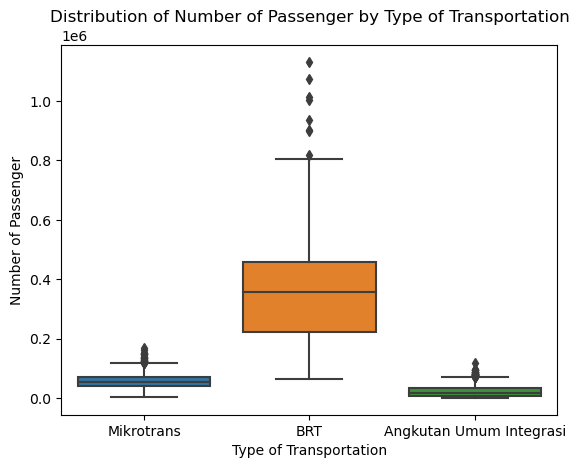

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for each 'jenis'
sns.boxplot(data=df_copy, x='jenis', y='jumlah_penumpang')
plt.xlabel('Type of Transportation')
plt.ylabel('Number of Passenger')
plt.title('Distribution of Number of Passenger by Type of Transportation')
plt.show()


In [120]:
df_copy['jumlah_penumpang'] = df_copy['jumlah_penumpang'].astype(int)

In [121]:
# Get the unique types of transportation
transportation_types = df_copy['jenis'].unique()

# Iterate over each transportation type
for transportation_type in transportation_types:
    # Select the data for the current transportation type
    data = df_copy[df_copy['jenis'] == transportation_type]['jumlah_penumpang']
    
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Set a threshold for outlier detection (e.g., Q1 - 1.5 * IQR or Q3 + 1.5 * IQR)
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    # Identify outliers for the current transportation type
    outliers = data[(data < lower_threshold) | (data > upper_threshold)]
    
    # Calculate the percentage of outliers compared to the total data
    percentage_outliers = len(outliers) / len(data) * 100
    
    # Print the percentage of outliers for the current transportation type
    print(f"Percentage of outliers for {transportation_type}: {percentage_outliers}%")


Percentage of outliers for Mikrotrans: 2.9904306220095696%
Percentage of outliers for BRT: 5.128205128205128%
Percentage of outliers for Angkutan Umum Integrasi: 8.315565031982942%


It can be seen that Mikrotrans data have low amount of outliers (below 5%) while BRT and Angkutan Umum Integrasi have moderate outliers (5-10%)

## Removing NaN data per month

Previously, we have checked the data and in clean data there's no more NaN value, especially in number of passenger. Yet, those data are is in total. However, we still need to check the number of passenger per month, to see if there are any missing value per month, if we want to see the overall trendline for each type of transportation to avoid any bias. 

In [130]:

#Pivot
grouped_data1 = df_copy.groupby(['bulan', 'kode_trayek'])['jumlah_penumpang'].sum().reset_index()
pivot_table1 = grouped_data1.pivot(index='kode_trayek', columns='bulan', values='jumlah_penumpang')

pivot_table1


bulan,1,2,3,4,5,6,7,8,9,10,11,12
kode_trayek,,,,,,,,,,,,
1,773717.0,799708.0,1013221.0,1003534.0,937452.0,899829.0,344528.0,462959.0,735653.0,903783.0,1073929.0,1131439.0
10,356211.0,349572.0,427032.0,424169.0,396760.0,393998.0,175900.0,213453.0,315308.0,369184.0,421487.0,419198.0
10K,41881.0,31243.0,36891.0,34736.0,31667.0,32798.0,23069.0,29478.0,32614.0,34615.0,34498.0,0.0
11,134632.0,134665.0,166555.0,162931.0,154256.0,148933.0,62391.0,74753.0,116020.0,135543.0,148930.0,163776.0
11D,61434.0,47628.0,58186.0,55677.0,51102.0,50089.0,33801.0,40578.0,48895.0,54197.0,59155.0,0.0
11Q,9436.0,8493.0,10948.0,11128.0,8906.0,10744.0,6363.0,7829.0,9875.0,9781.0,11353.0,0.0
12,137793.0,134609.0,164012.0,161849.0,138371.0,148267.0,62403.0,80348.0,121086.0,140853.0,163317.0,167399.0
12A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1463.0,NaN
12B,9506.0,9096.0,12131.0,12887.0,9408.0,10761.0,4641.0,5602.0,8145.0,8148.0,10187.0,0.0


After pivotting the data, it can be seen that there are number of passenger that is missing. There are some alternatives to treat this missing data such as:

1. Imputation: If the missing data is relatively small, we can impute or fill in the missing values using various techniques such as mean imputation, median imputation, or regression imputation. Imputing the missing data can help retain more complete information for analysis.

2. Removal: If the missing data is extensive and there is no reasonable way to impute or estimate the missing values accurately, we may consider removing the corresponding rows or columns from the dataset. 

In this case, we will remove the NaN data, as the data would be bias and we cannot check for any seasonality if we fill it with mean or median, we might also missing the insights of various outliers. Some of the route also have totally missing data, there's only data of passenger in some months. In this way, we can check for the trendline for each vehicle type more comprehensively. Excepet for route_code 6N, where the Nan data is only in Jan-Feb, we can assume that it just start operating from March.

However, in the business context, actually we might need further investigation for any of these missing data: This could involve looking into data collection processes, potential data entry errors, or other factors that could have contributed to missing values, for example the vehicle for the route is just available only for that month, or just started to operate. Understanding the causes of missing data can help ensure more accurate and reliable analysis.

In [135]:
exclude_kode_trayek = ['12A', '2P', '2Q', '6F', '6Q', 'GR2', 'GR3', 'GR4', 'GR5', 'JAK.10A', 'JAK.10B']
df_copy2 = df_copy.copy()
df_copy2 = df_copy2[~df_copy2['kode_trayek'].isin(exclude_kode_trayek)]


In [136]:
#Pivot
grouped_data3 = df_copy2.groupby(['bulan', 'kode_trayek'])['jumlah_penumpang'].sum().reset_index()
pivot_table3 = grouped_data3.pivot(index='kode_trayek', columns='bulan', values='jumlah_penumpang')

pivot_table3

bulan,1,2,3,4,5,6,7,8,9,10,11,12
kode_trayek,,,,,,,,,,,,
1,773717.0,799708.0,1013221.0,1003534.0,937452.0,899829.0,344528.0,462959.0,735653.0,903783.0,1073929.0,1131439.0
10,356211.0,349572.0,427032.0,424169.0,396760.0,393998.0,175900.0,213453.0,315308.0,369184.0,421487.0,419198.0
10K,41881.0,31243.0,36891.0,34736.0,31667.0,32798.0,23069.0,29478.0,32614.0,34615.0,34498.0,0.0
11,134632.0,134665.0,166555.0,162931.0,154256.0,148933.0,62391.0,74753.0,116020.0,135543.0,148930.0,163776.0
11D,61434.0,47628.0,58186.0,55677.0,51102.0,50089.0,33801.0,40578.0,48895.0,54197.0,59155.0,0.0
11Q,9436.0,8493.0,10948.0,11128.0,8906.0,10744.0,6363.0,7829.0,9875.0,9781.0,11353.0,0.0
12,137793.0,134609.0,164012.0,161849.0,138371.0,148267.0,62403.0,80348.0,121086.0,140853.0,163317.0,167399.0
12B,9506.0,9096.0,12131.0,12887.0,9408.0,10761.0,4641.0,5602.0,8145.0,8148.0,10187.0,0.0
13,266290.0,265717.0,334450.0,342002.0,323662.0,315765.0,124158.0,160187.0,254820.0,307410.0,305567.0,337233.0


## Clean Data

After cleaning the data now we have 1426 row from what's originally 1473 row and the rest of the miss typed and missing data have been filled with the correct one.

In [138]:
listItem = []
for col in df_copy2.columns:
    if df_copy2[col].nunique() < 2:
        unique_values = list(df_copy2[col].drop_duplicates().values)
    else:
        unique_values = list(df_copy2[col].drop_duplicates().sample(2, replace=False).values)
    
    listItem.append([col, df_copy2[col].dtype, df_copy2[col].isna().sum(),
                     df_copy2[col].nunique(), unique_values])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                      data=listItem)
print(df_copy2.shape)
dfDesc


(1426, 6)


,dataFeatures,dataType,null,unique,uniqueSample
0,tahun,int64,0,1,[2021]
1,bulan,int64,0,12,"[3, 10]"
2,jenis,object,0,3,"[Angkutan Umum Integrasi, BRT]"
3,kode_trayek,object,0,119,"[JAK.85, JAK.117]"
4,trayek,object,0,118,"[Kebayoran Lama - Tanah Abang, Tanjung Priok - Senen via Taman BMW]"
5,jumlah_penumpang,int32,0,1374,"[61657, 39786]"


## Data Analysis

##### 1. We can identify trend and patterns in passenger numbers over time, by transporation type and accros different route to check if there are any seasonality or trends. We also analyze the market share and growth rate per each type of transportation type.

Calculating the metrics by type of transportation allows us to compare and analyze the overall performance and trends of different transportation types. This approach can provide insights into the overall market share, growth rate, and passenger distribution among different transportation options. It can help identify the most popular or least utilized transportation types and understand the overall market dynamics.

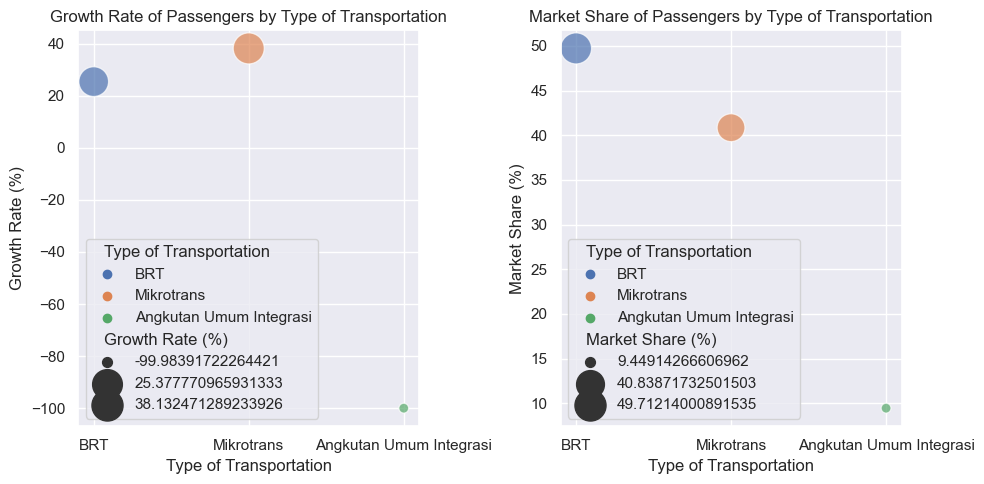

                          Type of Transportation  Total Passengers  \
jenis                                                                
BRT                      BRT                      59111356           
Mikrotrans               Mikrotrans               48560210           
Angkutan Umum Integrasi  Angkutan Umum Integrasi  11235719           

                         Market Share (%)  Growth Rate (%)  
jenis                                                       
BRT                      49.712140         25.377771        
Mikrotrans               40.838717         38.132471        
Angkutan Umum Integrasi  9.449143         -99.983917        


In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'jenis' (type of transportation)
grouped_data = df_copy2.groupby('jenis')

# Calculate the total number of passengers by type of transportation
total_passengers = grouped_data['jumlah_penumpang'].sum()

# Calculate the market share as a percentage
market_share = total_passengers / total_passengers.sum() * 100

# Calculate the growth rate for each type of jenis
growth_rate = []
for jenis, df_group in grouped_data:
    jan_passengers = df_group.loc[df_group['bulan'] == 1, 'jumlah_penumpang'].sum()
    dec_passengers = df_group.loc[df_group['bulan'] == 12, 'jumlah_penumpang'].sum()
    jenis_growth_rate = ((dec_passengers - jan_passengers) / jan_passengers) * 100
    growth_rate.append(jenis_growth_rate)

# Create a DataFrame to store the results
metrics_df = pd.DataFrame({
    'Type of Transportation': grouped_data.groups.keys(),
    'Total Passengers': total_passengers,
    'Market Share (%)': market_share,
    'Growth Rate (%)': growth_rate
})

# Sort the DataFrame by total passengers in descending order
metrics_df = metrics_df.sort_values('Total Passengers', ascending=False)

# Set the figure size
plt.figure(figsize=(10, 5))

# Generate packed bubble chart for growth rate
plt.subplot(1, 2, 1)
sns.scatterplot(data=metrics_df, x='Type of Transportation', y='Growth Rate (%)',
                size='Growth Rate (%)', sizes=(50, 500), alpha=0.7, hue='Type of Transportation')
plt.xlabel('Type of Transportation')
plt.ylabel('Growth Rate (%)')
plt.title('Growth Rate of Passengers by Type of Transportation')

# Generate packed bubble chart for market share
plt.subplot(1, 2, 2)
sns.scatterplot(data=metrics_df, x='Type of Transportation', y='Market Share (%)',
                size='Market Share (%)', sizes=(50, 500), alpha=0.7, hue='Type of Transportation')
plt.xlabel('Type of Transportation')
plt.ylabel('Market Share (%)')
plt.title('Market Share of Passengers by Type of Transportation')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Print the metrics DataFrame
print(metrics_df)


Based on the calculated market share and growth rate for each type of transportation:

1. Market Share:
   - BRT (Bus Rapid Transit) holds the largest market share with 50%. This indicates that BRT is the most popular mode of transportation among the three types.
   - Mikrotrans follows with a market share of 41%. It is the second most preferred transportation type among the options.
   - Angkutan Umum Integrasi (Integrated Public Transportation) has the lowest market share of 9%. It suggests that this type of transportation is less utilized compared to BRT and Mikrotrans.

2. Growth Rate:
   - BRT has a positive growth rate of 25%. This implies that the number of passengers using BRT increased by 25% from the first month (January) to the last month (December) of the year.
   - Mikrotrans shows a higher growth rate of 38%, indicating a significant increase in the number of passengers throughout the year.
   - Angkutan Umum Integrasi, on the other hand, experienced a negative growth rate of -99%. This suggests a substantial decline in the number of passengers using this type of transportation during the year.

Insights and Interpretation:
- BRT has the highest market share, indicating its popularity among commuters. However, its growth rate is relatively lower compared to Mikrotrans, suggesting a more stable growth pattern.
- Mikrotrans, with a lower market share, shows a higher growth rate, indicating its increasing popularity and potentially gaining market share from other transportation options.
- Angkutan Umum Integrasi has the lowest market share and experienced a significant decline in the number of passengers throughout the year, indicating a need for further analysis to understand the reasons behind the decline and develop strategies to improve its utilization.

Based on these insights, possible suggestions could include:
- Enhancing BRT services to maintain its market share and attract more passengers by improving convenience, comfort, and reliability.
- Analyzing the factors contributing to the high growth rate of Mikrotrans and identifying strategies to leverage this growth further, such as expanding routes or improving services.
- Investigating the reasons behind the decline in Angkutan Umum Integrasi's passenger count and taking necessary actions to address the issues, such as improving service quality, marketing campaigns, or exploring partnerships with other transportation providers.

C:\Users\Stephanie Aurelia\AppData\Local\Temp\ipykernel_33516\3614919982.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=grouped_data2, x='bulan', y='jumlah_penumpang', hue='jenis', ci=None)


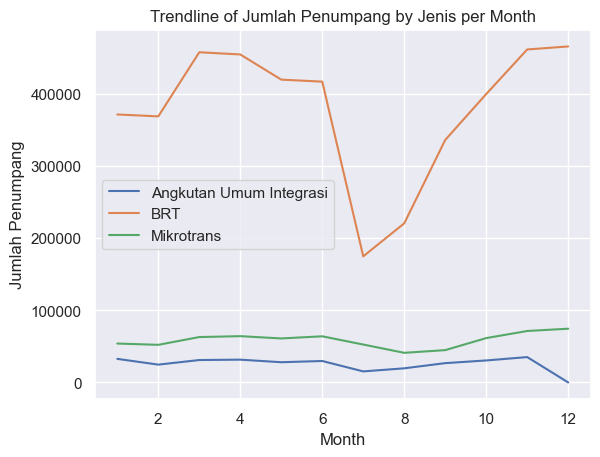

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'jenis' and 'month', and calculate the average of 'jumlah_penumpang'
grouped_data2 = df_copy2.groupby(['jenis', 'bulan'])['jumlah_penumpang'].mean().reset_index()

# Create a line plot with a trendline
sns.set(style='darkgrid')
sns.lineplot(data=grouped_data2, x='bulan', y='jumlah_penumpang', hue='jenis', ci=None)

# Set the x-axis label, y-axis label, and plot title
plt.xlabel('Month')
plt.ylabel('Jumlah Penumpang')
plt.title('Trendline of Jumlah Penumpang by Jenis per Month')

# Show the legend
plt.legend()

# Display the plot
plt.show()


Based on the analysis of number of passenger by type and month in 2021, here are some insights and suggestion:

1. BRT (Bus Rapid Transit) has the highest number of passengers compared to Angkutan Umum Integrasi and Mikrotrans. This can be attributed to the higher passenger capacity of BRT buses. It indicates that there is a higher demand for this type of transportation.

2. The fluctuation in the number of passengers for BRT indicates that there may be factors influencing passenger demand. Further analysis is required to identify the specific reasons for the decline in passenger numbers from June to July and the subsequent increase until November. This could involve investigating external factors such as changes in routes, service disruptions, or other events that might impact passenger behavior.

3. Mikrotrans shows a relatively stable number of passengers, slightly higher than Angkutan Umum Integrasi. This suggests that Mikrotrans is a preferred mode of transportation for a certain segment of passengers. Understanding the specific characteristics and preferences of these passengers can help optimize Mikrotrans services to cater to their needs.

4. The sudden drop to zero in the number of passengers for Angkutan Umum Integrasi from November to December is unusual and requires further investigation. It could be due to data recording issues, service interruptions, or other factors affecting passenger availability or usage. Identifying the cause of this drop is crucial for ensuring the reliability and continuity of Angkutan Umum Integrasi services.

5. In general there's a drop of number of passenger form Jun-Jul, with the biggest decline from BRT. The different trend lines for the three types of transportation indicate that there is no clear seasonality in passenger demand. This suggests that passenger behavior and demand are influenced by factors other than the typical seasonal patterns, such as holidays or vacation periods. Exploring additional variables, such as specific events, marketing campaigns, or changes in commuting patterns, can provide further insights into passenger behavior.

Some information to be taken is that during 2021, there'still a lot of regulations of COVID-19 that may have impacted the fluctuation in the number of passenger. 


Based on these insights, some suggestions for further analysis and action steps could include:

* Conducting a detailed investigation into the factors contributing to the fluctuation in passenger numbers for BRT, especially during the decline from June to July.
* Analyzing the route-specific data to identify any specific routes or areas that are experiencing significant changes in passenger demand.
* Exploring the reasons behind the sudden drop to zero in passenger numbers for Angkutan Umum Integrasi in November and implementing measures to address any issues affecting service availability or passenger awareness.
* Considering additional factors such as external events, promotions, or changes in commuting patterns to better understand passenger behavior and identify opportunities for service improvement or targeted marketing campaigns.



A. Investigate decline from June to July in number of passenger of BRT

We can calculate the increment of number of passenger from June to July for each route in BRT to know which route has the most decline. 

In [139]:
# Define the conditions for filtering
condition1 = (df_copy2['jenis'] == 'BRT')  # First condition for column1
condition2 = (df_copy2['bulan'].isin([6])) 
condition3 = (df_copy2['bulan'].isin([7]))  

# Apply the conditions to filter the DataFrame
array_1 = df_copy2[condition1 & condition2].groupby('kode_trayek').mean() #BRT month 6
array_2 = df_copy2[condition1 & condition3].groupby('kode_trayek').mean() #BRT month 7


# Display the filtered DataFrame
array_3= array_2['jumlah_penumpang'] - array_1['jumlah_penumpang']
array_3

C:\Users\Stephanie Aurelia\AppData\Local\Temp\ipykernel_33516\1971157751.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  array_1 = df_copy2[condition1 & condition2].groupby('kode_trayek').mean() #BRT month 6
C:\Users\Stephanie Aurelia\AppData\Local\Temp\ipykernel_33516\1971157751.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  array_2 = df_copy2[condition1 & condition3].groupby('kode_trayek').mean() #BRT month 7


kode_trayek
1    -555301.0
10   -218098.0
11   -86542.0 
12   -85864.0 
13   -191607.0
2    -208570.0
3    -279033.0
4    -157495.0
5    -271657.0
6    -213185.0
7    -230651.0
8    -283091.0
9    -365937.0
Name: jumlah_penumpang, dtype: float64

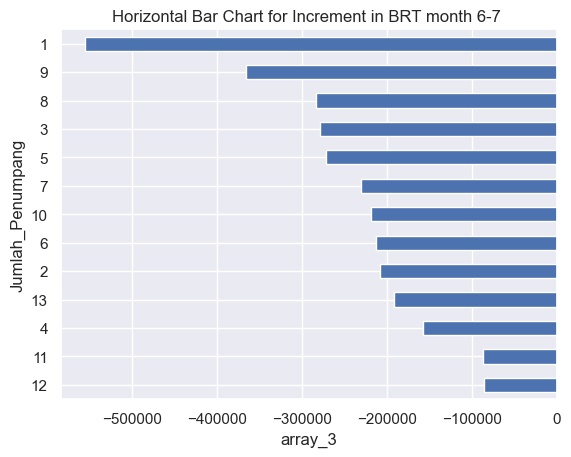

In [140]:

# Sort the column by values in ascending order
sorted_df = array_3.sort_values(ascending=False)
sorted_df

# # Create the horizontal bar chart
sorted_df.plot(kind='barh')

# # Set the title and labels
plt.title('Horizontal Bar Chart for Increment in BRT month 6-7 ')
plt.xlabel('array_3')
plt.ylabel('Jumlah_Penumpang')

# # Display the plot
plt.show()


It can be seen that most contribution of the decline is coming from route 1: Blok M - Kota (this information we can get from the previous mapping), followed by route 9 & 8.  

There can be several possibilities that may have caused the decline in passenger count on specific routes. Some potential factors to consider:

Service Disruptions: There might be any service disruptions during that period, such as road closures, construction, or changes in bus schedules. These disruptions can impact passenger flow and discourage ridership.

Competition from Other Modes of Transportation: Any emerging or existing alternative modes of transportation may have attracted passengers away from the specific routes. For example, the availability of ride-sharing services, bike-sharing programs, or other public transportation options could have influenced passenger choices.

Customer Satisfaction: We can consider if there were any issues related to the quality of service, such as overcrowded buses, long waiting times, or inadequate frequency. Poor customer experience can discourage passengers from using specific routes.

Changing Demographics or Residential Patterns: Any changes in the local demographics or residential patterns could have affected the demand for public transportation on those routes. For instance, if there was a significant shift in population or the opening/closing of major employment centers, educational institutions, or recreation area. 

Fare Structure and Pricing: Fare structure and pricing for the routes in question could affect it too. If the fares are perceived as high or there have been recent fare increases, it could impact passenger demand and lead to a decline in ridership.

It's essential to conduct further analysis, gather additional data, and gather feedback from passengers to pinpoint the specific reasons behind the decline in passenger count on those routes. This information will help in formulating targeted strategies and making informed decisions to address the underlying causes and improve ridership.

B. Investigate sudden drop to 0 from Nov-Dec for Angkutan Umum Integrasi

In [143]:
# Define the conditions for filtering
x = (df_copy2['jenis'] == 'Angkutan Umum Integrasi') # First condition for column1
y = (df_copy2['bulan'].isin([11])) 
z = (df_copy2['bulan'].isin([12]))  

# Apply the conditions to filter the DataFrame
Angkot_11 = df_copy2[x & y].groupby('kode_trayek').mean() #Angkutan Umum Integrasi month 11
Angkot_12= df_copy2[x & z].groupby('kode_trayek').mean() #Angkutan Umum Integrasi month 12


# Display the filtered DataFrame
Increment= Angkot_12['jumlah_penumpang'] - Angkot_11['jumlah_penumpang']
Increment

C:\Users\Stephanie Aurelia\AppData\Local\Temp\ipykernel_33516\2943339497.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Angkot_11 = df_copy2[x & y].groupby('kode_trayek').mean() #Angkutan Umum Integrasi month 11
C:\Users\Stephanie Aurelia\AppData\Local\Temp\ipykernel_33516\2943339497.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Angkot_12= df_copy2[x & z].groupby('kode_trayek').mean() #Angkutan Umum Integrasi month 12


kode_trayek
10K   -34498.0 
11D   -59155.0 
11Q   -11353.0 
12B   -10187.0 
1A    -82972.0 
1B    -40391.0 
1C    -16241.0 
1E    -78905.0 
1F     0.0     
1H    -50329.0 
1M    -22326.0 
1N    -14060.0 
1P    -13565.0 
1Q    -29556.0 
1R    -8819.0  
3E    -14397.5 
4B    -46314.0 
4F    -43945.0 
5B    -8999.0  
5F    -18105.0 
5M    -95933.0 
6C    -118725.0
6H    -24575.0 
6M    -24756.0 
6N    -31447.0 
6R     0.0     
7A    -88324.0 
7B    -87269.0 
7D    -27221.0 
7P    -32337.0 
8C     0.0     
8D    -27154.0 
8E    -19613.0 
8K    -9463.0  
9D    -87210.0 
9E    -22996.0 
9H    -20159.0 
Name: jumlah_penumpang, dtype: float64

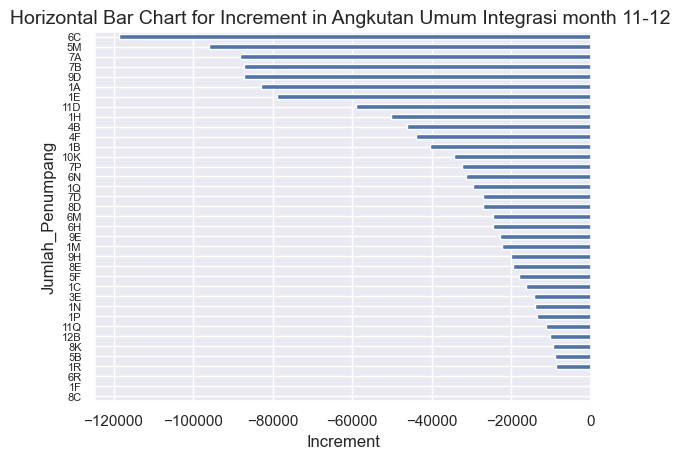

In [145]:
# Sort the column by values in ascending order
sorted_df1 = Increment.sort_values(ascending=False)
sorted_df1

# # Create the horizontal bar chart
sorted_df1.plot(kind='barh')

# # Set the title and labels
plt.title('Horizontal Bar Chart for Increment in Angkutan Umum Integrasi month 11-12 ', fontsize = 14)
plt.xlabel('Increment', fontsize = 12)
plt.ylabel('Jumlah_Penumpang', fontsize = 12)

plt.tick_params(axis='y', labelsize=8)

# # Display the plot
plt.show()


It can be seen that only the Angkutan Umum transportation type experienced a total drop to 0 passengers in December 2021 while other transportation types showed an increase, there might be specific reasons related to Angkutan Umum that caused this decline. Here are a few possibilities:

1. Service Suspension: It's possible that Angkutan Umum services were temporarily suspended or significantly reduced during December 2021. This could be due to operational issues, maintenance, or specific policies implemented by the transportation authority or government.

2. Shift in Commuting Habits: December is typically a month when commuting patterns can change, especially with holidays and year-end activities. People might opt for alternative transportation modes or choose to stay home more often during this time, leading to a decrease in demand for Angkutan Umum services.

3. COVID-19 Impact: As COVID-19 situations and restrictions can fluctuate, it's possible that there were specific measures or concerns related to the pandemic in December 2021 that affected Angkutan Umum more significantly compared to other transportation types.

4. Market Competition: There may have been increased competition from other transportation options during December 2021, such as ride-sharing services, private transportation, or even seasonal transportation offerings. This competition could have drawn passengers away from Angkutan Umum.

To gain deeper insights and a better understanding of the exact reasons behind the decline in Angkutan Umum passenger numbers in December 2021, it would be helpful to gather more specific data, conduct further analysis, and consider any contextual factors or events that were happening during that period.

#### 2. We can compare the number of passenger counts between different routes to identify the most popular or least utilized one. We can calculate the growth rate, market shares, or ratios to make meaningful comparison.

A. Growth Rate and Market Share of BRT's route

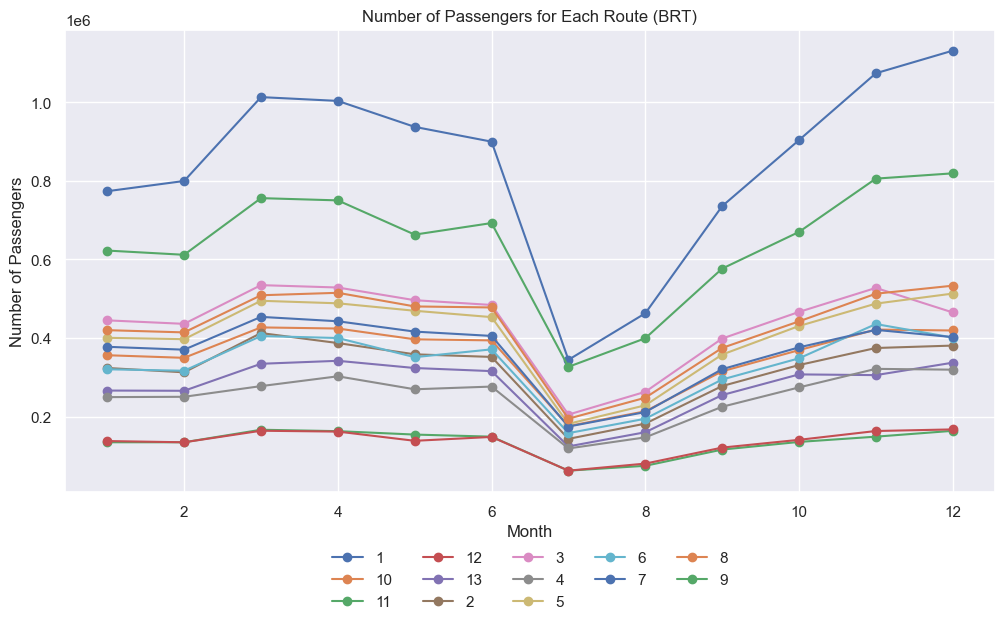

In [220]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for BRT transportation type
brt_data = df_copy2[df_copy2['jenis'] == 'BRT']

# Group the data by route and month
grouped_data = brt_data.groupby(['kode_trayek', 'bulan'])

# Calculate the total number of passengers for each route and month
passenger_counts = grouped_data['jumlah_penumpang'].sum()

# Reshape the data to have routes as columns and months as rows
passenger_counts = passenger_counts.unstack(level='kode_trayek')

# Plot the line chart
passenger_counts.plot(kind='line', marker='o', figsize=(12, 6))

# Set the x-axis label
plt.xlabel('Month')

# Set the y-axis label
plt.ylabel('Number of Passengers')

# Set the title of the chart
plt.title('Number of Passengers for Each Route (BRT)')

# Adjust the legend placement and size
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, frameon=False)

# Display the line chart
plt.show()


It can be seen here for BRT, Route no 1 Blok M- Kota has the highest number of passenger and also growth, but it also has the biggest decline from Jun-Jul.  Route 11 & 12 have the lowest number of passenger and growth rate. 

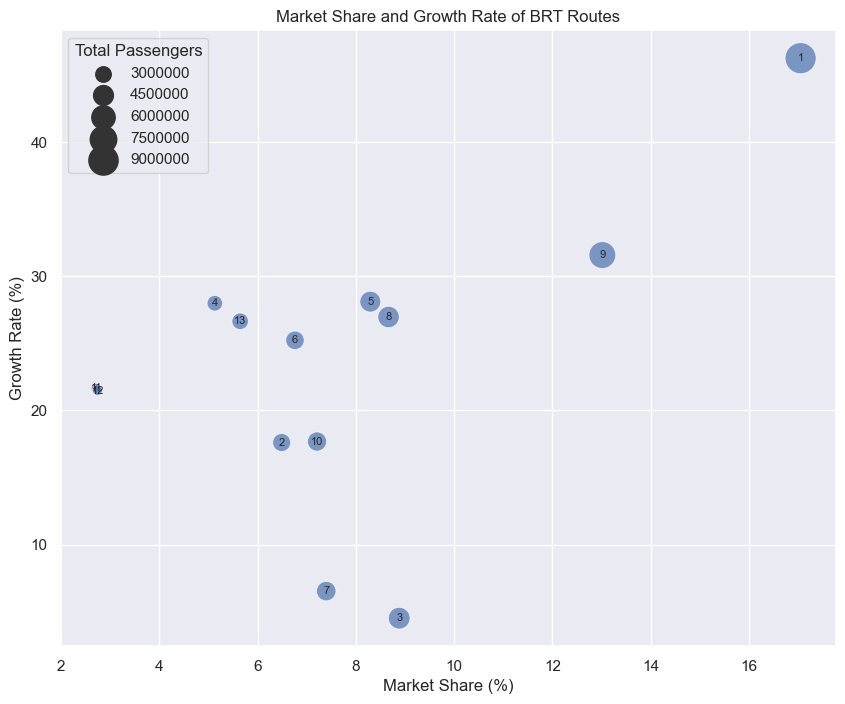

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for BRT type of transportation
brt_data = df_copy2[df_copy2['jenis'] == 'BRT']

# Group the data by 'kode_trayek' (route)
grouped_data = brt_data.groupby('kode_trayek')

# Calculate the total number of passengers by route
total_passengers = grouped_data['jumlah_penumpang'].sum()

# Calculate the market share as a percentage
market_share = total_passengers / total_passengers.sum() * 100

# Calculate the growth rate for each route
growth_rate = []
for route, df_group in grouped_data:
    jan_passengers = df_group.loc[df_group['bulan'] == 1, 'jumlah_penumpang'].sum()
    dec_passengers = df_group.loc[df_group['bulan'] == 12, 'jumlah_penumpang'].sum()
    route_growth_rate = ((dec_passengers - jan_passengers) / jan_passengers) * 100
    growth_rate.append(route_growth_rate)

# Create a DataFrame to store the results
metrics_df = pd.DataFrame({
    'Route': total_passengers.index,
    'Total Passengers': total_passengers,
    'Market Share (%)': market_share,
    'Growth Rate (%)': growth_rate
})

# Set the figure size
plt.figure(figsize=(10, 8))

# Generate bubble chart for market share and growth rate
sns.scatterplot(data=metrics_df, x='Market Share (%)', y='Growth Rate (%)',
                size='Total Passengers', sizes=(50, 500), alpha=0.7)

# Add labels to each bubble
for i, row in metrics_df.iterrows():
    plt.text(row['Market Share (%)'], row['Growth Rate (%)'], row['Route'],
             ha='center', va='center', fontsize=8)

plt.xlabel('Market Share (%)')
plt.ylabel('Growth Rate (%)')
plt.title('Market Share and Growth Rate of BRT Routes')

# Display the plot
plt.show()


B. Growth Rate and Market Share of Mikrotrans's route

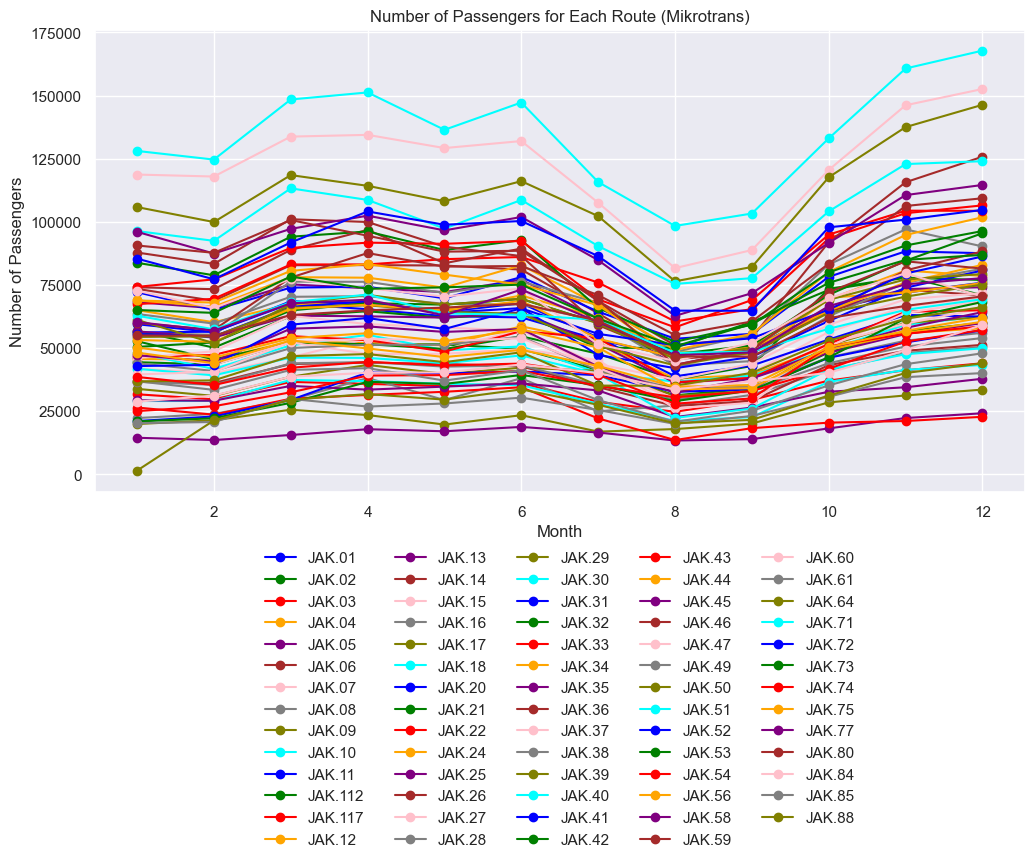

In [224]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for Mikrotrans transportation type
mikrotrans_data = df_copy2[df_copy2['jenis'] == 'Mikrotrans']

# Group the data by route and month
grouped_data = mikrotrans_data.groupby(['kode_trayek', 'bulan'])

# Calculate the total number of passengers for each route and month
passenger_counts = grouped_data['jumlah_penumpang'].sum()

# Reshape the data to have routes as columns and months as rows
passenger_counts = passenger_counts.unstack(level='kode_trayek')

# Define a list of colors for each line
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Plot the line chart with different colors
passenger_counts.plot(kind='line', marker='o', figsize=(12, 6), color=colors)

# Set the x-axis label
plt.xlabel('Month')

# Set the y-axis label
plt.ylabel('Number of Passengers')

# Set the title of the chart
plt.title('Number of Passengers for Each Route (Mikrotrans)')

# Adjust the legend placement and size
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, frameon=False)

# Display the line chart
plt.show()


For Mikrotrans, the number of passenger in Jak.30 (Grogol - Meryua via Roxy) has the biggest number of passenger, but the biggest growth is coming from Jak.88 (Terminal Tanjung Priok - Ancol Barat)

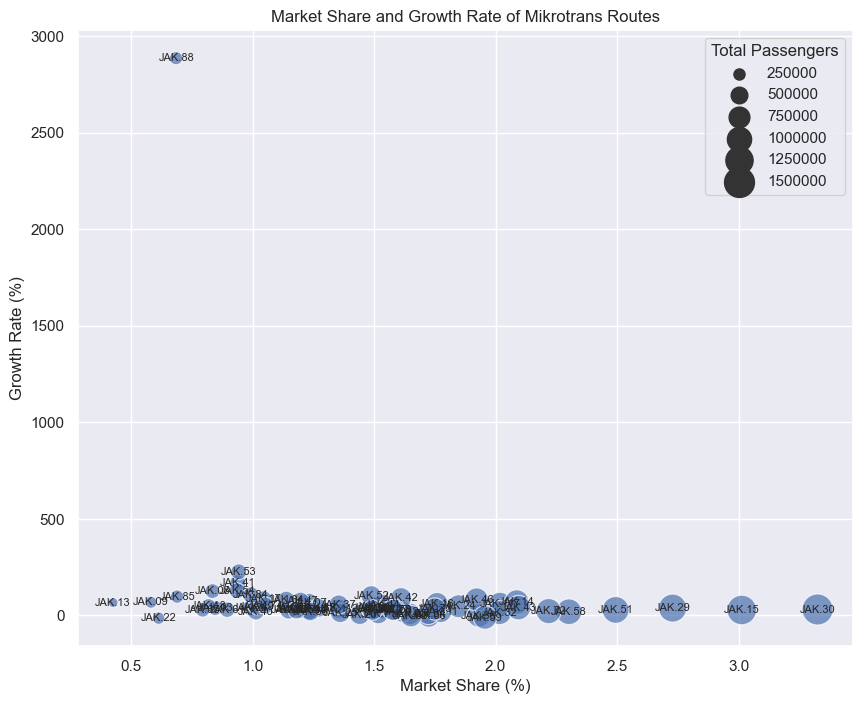

In [226]:

# Filter the data for BRT type of transportation
mikrotrans_data = df_copy2[df_copy2['jenis'] == 'Mikrotrans']

# Group the data by 'kode_trayek' (route)
grouped_data = mikrotrans_data.groupby('kode_trayek')

# Calculate the total number of passengers by route
total_passengers = grouped_data['jumlah_penumpang'].sum()

# Calculate the market share as a percentage
market_share = total_passengers / total_passengers.sum() * 100

# Calculate the growth rate for each route
growth_rate = []
for route, df_group in grouped_data:
    jan_passengers = df_group.loc[df_group['bulan'] == 1, 'jumlah_penumpang'].sum()
    dec_passengers = df_group.loc[df_group['bulan'] == 12, 'jumlah_penumpang'].sum()
    route_growth_rate = ((dec_passengers - jan_passengers) / jan_passengers) * 100
    growth_rate.append(route_growth_rate)

# Create a DataFrame to store the results
metrics_df = pd.DataFrame({
    'Route': total_passengers.index,
    'Total Passengers': total_passengers,
    'Market Share (%)': market_share,
    'Growth Rate (%)': growth_rate
})

# Set the figure size
plt.figure(figsize=(10, 8))

# Generate bubble chart for market share and growth rate
sns.scatterplot(data=metrics_df, x='Market Share (%)', y='Growth Rate (%)',
                size='Total Passengers', sizes=(50, 500), alpha=0.7)

# Add labels to each bubble
for i, row in metrics_df.iterrows():
    plt.text(row['Market Share (%)'], row['Growth Rate (%)'], row['Route'],
             ha='center', va='center', fontsize=8)

plt.xlabel('Market Share (%)')
plt.ylabel('Growth Rate (%)')
plt.title('Market Share and Growth Rate of Mikrotrans Routes')

# Display the plot
plt.show()


C. Growth Rate and Market Share of Angkutan Umum Integrasi's Route

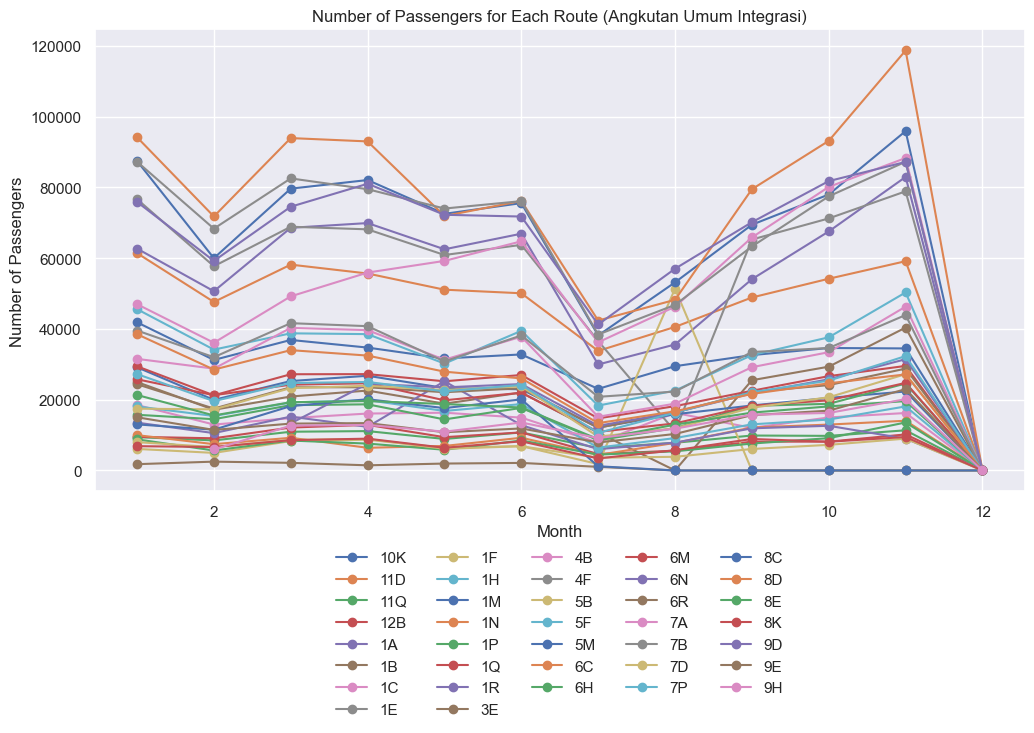

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for Angkutan Umum Integrasi transportation type
angkot_data = df_copy2[df_copy2['jenis'] == 'Angkutan Umum Integrasi']

# Group the data by route and month
grouped_data = angkot_data.groupby(['kode_trayek', 'bulan'])

# Calculate the total number of passengers for each route and month
passenger_counts = grouped_data['jumlah_penumpang'].sum()

# Reshape the data to have routes as columns and months as rows
passenger_counts = passenger_counts.unstack(level='kode_trayek')

# Plot the line chart
passenger_counts.plot(kind='line', marker='o', figsize=(12, 6))

# Set the x-axis label
plt.xlabel('Month')

# Set the y-axis label
plt.ylabel('Number of Passengers')

# Set the title of the chart
plt.title('Number of Passengers for Each Route (Angkutan Umum Integrasi)')

# Adjust the legend placement and size
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, frameon=False)

# Display the line chart
plt.show()


For Angkutan Umum Integrasi, route 6C has the highest number of passenger over the time however it also has the sharpest dceline in the growth rate. As it has been explained before, number of passenger of Angkutan Umum Integrasi declined to 0 in December due to several factors assumption. 

C:\Users\Stephanie Aurelia\AppData\Local\Temp\ipykernel_33516\424324684.py:22: RuntimeWarning: invalid value encountered in longlong_scalars
  route_growth_rate = ((dec_passengers - jan_passengers) / jan_passengers) * 100
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


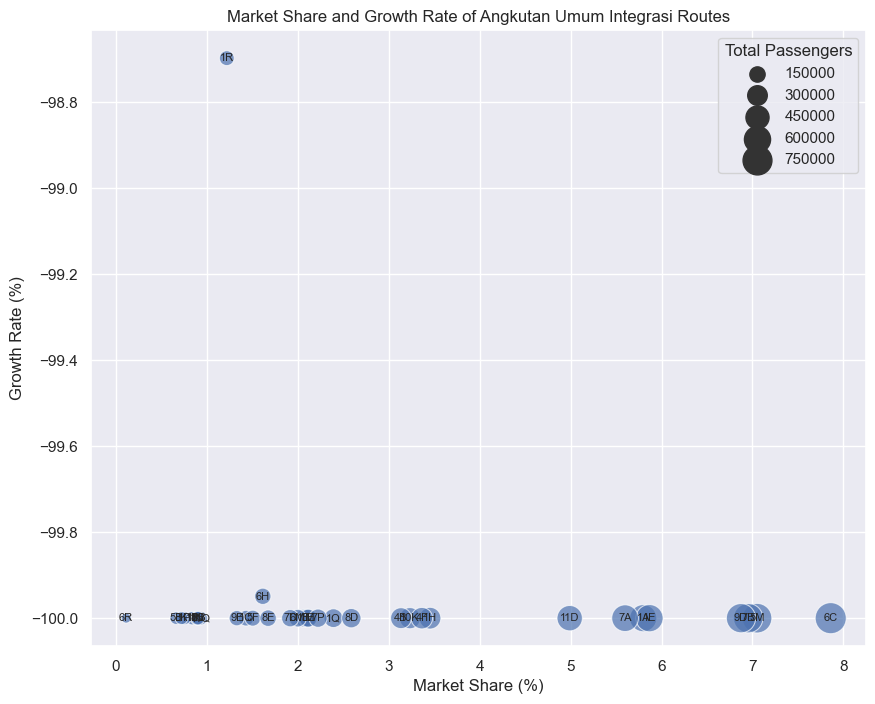

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for BRT type of transportation
angkot_data = df_copy2[df_copy2['jenis'] == 'Angkutan Umum Integrasi']

# Group the data by 'kode_trayek' (route)
grouped_data = angkot_data.groupby('kode_trayek')

# Calculate the total number of passengers by route
total_passengers = grouped_data['jumlah_penumpang'].sum()

# Calculate the market share as a percentage
market_share = total_passengers / total_passengers.sum() * 100

# Calculate the growth rate for each route
growth_rate = []
for route, df_group in grouped_data:
    jan_passengers = df_group.loc[df_group['bulan'] == 1, 'jumlah_penumpang'].sum()
    dec_passengers = df_group.loc[df_group['bulan'] == 12, 'jumlah_penumpang'].sum()
    route_growth_rate = ((dec_passengers - jan_passengers) / jan_passengers) * 100
    growth_rate.append(route_growth_rate)

# Create a DataFrame to store the results
metrics_df = pd.DataFrame({
    'Route': total_passengers.index,
    'Total Passengers': total_passengers,
    'Market Share (%)': market_share,
    'Growth Rate (%)': growth_rate
})

# Set the figure size
plt.figure(figsize=(10, 8))

# Generate bubble chart for market share and growth rate
sns.scatterplot(data=metrics_df, x='Market Share (%)', y='Growth Rate (%)',
                size='Total Passengers', sizes=(50, 500), alpha=0.7)

# Add labels to each bubble
for i, row in metrics_df.iterrows():
    plt.text(row['Market Share (%)'], row['Growth Rate (%)'], row['Route'],
             ha='center', va='center', fontsize=8)

plt.xlabel('Market Share (%)')
plt.ylabel('Growth Rate (%)')
plt.title('Market Share and Growth Rate of Angkutan Umum Integrasi Routes')

# Display the plot
plt.show()


3. We can do hypothesis testing to determine if there are any significant differences in passengers count based on different variables.  


A. Significant difference of number of passenger per each type of transportation

In [198]:
import pandas as pd

# Group the data by 'jenis' (type of transportation)
grouped_data = df_copy2.groupby('jenis')

# Calculate descriptive statistics for jumlah_penumpang
statistics = grouped_data['jumlah_penumpang'].describe()

# Print the statistics
print(statistics)


                         count           mean            std      min  \
jenis                                                                   
Angkutan Umum Integrasi  442.0  25420.178733   23694.066185   0.0       
BRT                      156.0  378918.948718  211852.308856  62391.0   
Mikrotrans               828.0  58647.596618   25163.251592   1473.0    

                               25%       50%        75%        max  
jenis                                                               
Angkutan Umum Integrasi  8864.25    18321.0   33957.00   118725.0   
BRT                      222132.75  357060.0  456104.00  1131439.0  
Mikrotrans               41212.25   54956.0   71066.75   167782.0   


In [201]:
import pandas as pd
from scipy.stats import kruskal

# Filter data berdasarkan jenis transportasi
jenis_transportasi = ['BRT', 'Mikrotrans', 'Angkutan Umum Integrasi']
filtered_data = df_copy2[df_copy2['jenis'].isin(jenis_transportasi)]

# Melakukan uji Kruskal-Wallis
results = kruskal(
    filtered_data[filtered_data['jenis'] == 'BRT']['jumlah_penumpang'],
    filtered_data[filtered_data['jenis'] == 'Mikrotrans']['jumlah_penumpang'],
    filtered_data[filtered_data['jenis'] == 'Angkutan Umum Integrasi']['jumlah_penumpang']
)

# Menampilkan hasil uji
print("Hasil Uji Kruskal-Wallis:")
print("Statistic:", results.statistic)
print("p-value:", results.pvalue)


Hasil Uji Kruskal-Wallis:
Statistic: 738.7736523536956
p-value: 3.7786764212061396e-161


From the Kruskal-Wallis test, we obtained a test statistic value of 738.77 and a p-value of 3.78e-161. The very small p-value indicates the presence of a significant difference between at least one pair of transportation types in terms of passenger count.

Therefore, we can reject the null hypothesis that there is no significant difference between transportation types in terms of passenger count. This suggests that there are significant differences in passenger count among the three transportation types (BRT, Mikrotrans, and Others), as it is displayed in the line chart as well. 

B. Significant difference of number of passenger per each route of BRT

In [209]:
from scipy.stats import kruskal

jenis_transportasi = 'BRT'

# Filter data for jenis transportasi BRT
data_brt = df_copy2[df_copy2['jenis'] == jenis_transportasi]

# Group the data by route
grouped_data = data_brt.groupby('kode_trayek')

# Create an empty list to store the data for each route
data_routes = []

# Iterate over each route and extract the number of passengers data
for route, df_group in grouped_data:
    data_route = df_group['jumlah_penumpang']
    data_routes.append(data_route)

# Perform the Kruskal-Wallis test
stat, p_value = kruskal(*data_routes)

# Print the results
print(f"Statistic: {stat}")
print(f"p-value: {p_value}")


Statistic: 110.74089498611784
p-value: 4.269836425103112e-18


From the Kruskal-Wallis test results, we obtained a test statistic value of 110.74 and a p-value of 4.27e-18. The small p-value suggests that there is a significant difference in the number of passengers among the routes in the BRT transportation type.

Therefore, we can reject the null hypothesis and conclude that there is evidence to support the presence of a significant difference in the number of passengers across the routes in the BRT transportation type.

C. Significant difference of number of passenger per each route of Mikrotrans

In [214]:
from scipy.stats import kruskal

jenis_transportasi = 'Mikrotrans'

# Filter data for jenis transportasi Mikrotrans
data_mikrotrans2 = df_copy2[df_copy2['jenis'] == jenis_transportasi]

# Group the data by route
grouped_data = data_mikrotrans2.groupby('kode_trayek')

# Create an empty list to store the data for each route
data_routes = []

# Iterate over each route and extract the number of passengers data
for route, df_group in grouped_data:
    data_route = df_group['jumlah_penumpang']
    data_routes.append(data_route)

# Perform the Kruskal-Wallis test
stat, p_value = kruskal(*data_routes)

# Print the results
print(f"Statistic: {stat}")
print(f"p-value: {p_value}")


Statistic: 638.4459867135416
p-value: 1.2789493808159078e-93


From the Kruskal-Wallis test results for the Mikrotrans transportation type, we obtained a test statistic value of 638.45 and a p-value of 1.28e-93. The extremely small p-value indicates that there is a significant difference in the number of passengers among the routes in the Mikrotrans transportation type.

Based on this result, we can reject the null hypothesis and conclude that there is strong evidence to support the presence of a significant difference in the number of passengers across the routes in the Mikrotrans transportation type.

D. Significant difference of number of passenger per each route of Angkutan Umum Integrasi

In [213]:
from scipy.stats import kruskal

jenis_transportasi = 'Angkutan Umum Integrasi'

# Filter data for jenis transportasi BRT
data_angkot1 = df_copy2[df_copy2['jenis'] == jenis_transportasi]

# Group the data by route
grouped_data = data_angkot1.groupby('kode_trayek')

# Create an empty list to store the data for each route
data_routes = []

# Iterate over each route and extract the number of passengers data
for route, df_group in grouped_data:
    data_route = df_group['jumlah_penumpang']
    data_routes.append(data_route)

# Perform the Kruskal-Wallis test
stat, p_value = kruskal(*data_routes)

# Print the results
print(f"Statistic: {stat}")
print(f"p-value: {p_value}")


Statistic: 266.66861503605645
p-value: 5.3123816385804295e-37


From the Kruskal-Wallis test results for the Angkutan Umum Integrasi transportation type, we obtained a test statistic value of 266.67 and a p-value of 5.31e-37. The extremely small p-value suggests that there is a significant difference in the number of passengers among the routes in the Angkutan Umum Integrasi transportation type.

Therefore, we can reject the null hypothesis and conclude that there is strong evidence to support the presence of a significant difference in the number of passengers across the routes in the Angkutan Umum Integrasi transportation type.

## Conclusion


Overall, the analysis provides valuable insights into the usage and performance of different types of public transportation in Jakarta. The findings highlight the market share, growth rates, and passenger trends for each transportation type and route. By addressing the identified issues and capitalizing on growth opportunities, transportation authorities and service providers can improve the efficiency, effectiveness, and customer satisfaction of public transportation in Jakarta.

1. Market Share and Growth Rate:
   - Bus Rapid Transit (BRT) holds the largest market share with 50%, followed by Mikrotrans with 41% and Angkutan Umum Integrasi with 9%.
   - BRT exhibits a relatively stable growth rate of 25%, while Mikrotrans shows a higher growth rate of 38%. Angkutan Umum Integrasi, however, experienced a significant decline in passenger numbers with a growth rate of -99%..

2. Analysis of Passenger Numbers:
   - BRT has the highest number of passengers, indicating its popularity among commuters. Mikrotrans follows closely behind, while Angkutan Umum Integrasi has the lowest passenger count.
   - The fluctuation in passenger numbers for BRT suggests the presence of external factors influencing demand, requiring further investigation.
   - Mikrotrans shows a relatively stable number of passengers, indicating its appeal to a specific segment of passengers.
   - Angkutan Umum Integrasi experienced a sudden drop to zero passengers in December 2021, necessitating a deeper understanding of the underlying causes.

3. Route Analysis:
   - Route 1 (Blok M - Kota) for BRT had the highest number of passengers and growth but also experienced a significant decline from June to July.
   - Jak.30 (Grogol - Meruya via Roxy) for Mikrotrans had the highest number of passengers, while Jak.88 (Terminal Tanjung Priok - Ancol Barat) exhibited the highest growth rate.
   - Route 6C for Angkutan Umum Integrasi had the highest number of passengers but experienced a sharp decline in growth rate, reaching zero passengers in December.

4. Hypothesis Testing:
   - The Kruskal-Wallis test revealed that there are significant differences in passenger counts based on transportation type, month, and route.
  
  Suggestions:

1. BRT:
   * Conduct passenger surveys: Administer surveys to BRT passengers during the periods of decline to gather insights on their reasons for reduced usage. Inquire about their satisfaction with the service, any issues they encountered, or potential alternatives they chose.
   * Evaluate service reliability: Analyze the reliability of BRT services during the periods of decline. Look for instances of service disruptions, delays, or any other factors that might have affected passenger confidence and utilization.
   * Assess competition and alternatives: Investigate if there were new competitive transportation options or alternative routes that emerged during the decline. Evaluate their impact on passenger choices and identify areas where BRT can improve or differentiate itself to regain ridership.
   * Analyze external factors: Consider external factors such as major events, construction projects, or changes in urban development that might have influenced passenger numbers. Look for correlations between these events and the decline in ridership.

2. Angkutan Umum Integrasi:
   * Analyze operational data: Review the operational data for all Angkutan Umum Integrasi routes during the month of December. Look for any significant disruptions, route changes, or service suspensions that might explain the complete absence of passengers. Check if there were any issues with vehicle availability, driver shortages, or other operational challenges.

   * Evaluate external factors: Consider external factors that might have influenced the passenger decline. Look for major events, holidays, or weather conditions that could have impacted people's travel behavior. Assess if there were any road closures, construction projects, or changes in the transportation landscape that affected the routes.

   * Engage with stakeholders: Speak with Angkutan Umum Integrasi operators, drivers, and relevant authorities to gather insights. Conduct interviews or surveys to understand their perspectives on the situation. Ask about any known issues, challenges, or changes that might have led to the complete lack of passengers. Their input could provide valuable information about the underlying causes.

   * Compare with alternative modes of transportation: Investigate if there were any alternative transportation options that gained popularity during December. Check for the emergence of new ride-sharing services, changes in public transport routes, or any other factors that might have led people to choose alternatives over Angkutan Umum Integrasi. Analyze the competitive landscape to identify potential reasons for the decline.


By implementing these specific investigative suggestions, you can gather more targeted data and insights to determine the underlying causes behind the decline in passenger numbers on specific BRT routes and Angkutan Umum Integrasi. This information will help guide the development of strategies to address the identified issues and improve public transportation utilization in Jakarta.


In [215]:
df_copy2.to_csv(r'C:\Users\Stephanie Aurelia\Desktop\Purwadhika\Clean Data Transjakarta 2021_V2.csv', index=False)